In [45]:
%matplotlib inline
import numpy as np
from statsmodels.formula.api import ols, rlm, gls, glm, wls, probit, logit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set(style="ticks", palette="Set2")

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Caso 2.2.
Influencia de la prohibición de fumar en el trabajo sobre los fumadores en EE.UU.
En este ejercicio se va a estudiar el efecto que tiene sobre el hábito de fumar, el hecho de que las empresas prohíban fumar en el puesto de trabajo. Utilizaremos los datos contenidos en el fichero Smoking.xls que tiene datos de corte transversal de una muestra de 10.000 trabajadores de EE.UU desde 1991 a 1993. El conjunto de datos contiene información sobre si las personas estaban o no estaban sujetas a una prohibición de fumar en el trabajo, si las personas fumaban, y otras características individuales. Las variables y su descripción es la siguiente:

Definiciones de las variables

|Variable| Definición|
|-:|:-|
|__smoker__ |=1 si el sujeto fuma, =0 si no fuma|
|__smkban__ |=1 si no se puede fumar en el trabajo, =0 en otro caso|
|__age__|edad del sujeto en años|
|__hsdrop__ |=1 si abandonó sus estudios, =0 en otro caso|
|__hsgrad__ |=1 si tiene estudios de secundaria, =0 en otro caso|
|__colsome__ |=1 si tiene educación de bachillerato, =0 en otro caso|
|__colgrad__ |=1 si tiene licenciatura universitaria, =0 en otro caso|
|__black__ |=1 si es negro, =0 en otro caso|
|__hispanic__ |=1 si es hispano =0 en otro caso|
|__female__ |=1 si es mujer, =0 en otro caso|


_Nota: El indicador binario de educación indica el máximo grado alcanzado en los estudios, estas variables son excluyentes, por ejemplo, una persona que tenga un título de doctorado universitario tendrá valores 0 en las variables hsdrop, hsgrad, colsome, y colgrad._

# a) 
Para conocer un poco las __características de los datos__:

- Primero haremos un estudio de la __distribución de frecuencias__ de las variables y el __histograma__ de la variable __age (edad)__. 
- Después __estimaremos__ un __modelo de Probabilidad Lineal__ entre la variable __smoker y smkban__ y partir del mismo calcularemos: 
    - (i) La probabilidad de __fumar para todos__ los trabajadores, 
    - (ii) La probabilidad de __fumar para__ los trabajadores __afectados por la prohibición__ de fumar en el trabajo, - 
    - (iii) La probabilidad de __fumar para__ los trabajadores que pueden fumar en su __puesto de trabajo__.

Asimismo, a partir de la estimación anterior

¿cuál es la diferencia en la probabilidad de fumar entre los trabajadores afectados por la prohibición de fumar en el trabajo y los que no están afectados por dicha prohibición? 

¿Es estadísticamente significativa esa diferencia?

In [5]:
data = pd.read_excel('Smoking.xls')

In [7]:
data.head()

,smoker,smkban,age,hsdrop,hsgrad,colsome,colgrad,black,hispanic,female
0,1,1,41,0,1,0,0,0,0,1
1,1,1,44,0,0,1,0,0,0,1
2,0,0,19,0,0,1,0,0,0,1
3,1,0,29,0,1,0,0,0,0,1
4,0,1,28,0,0,1,0,0,0,1


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
smoker,10000,0.2423,0.428496,0,0,0,0,1
smkban,10000,0.6098,0.487819,0,0,1,1,1
age,10000,38.6932,12.113783,18,29,37,47,88
hsdrop,10000,0.0912,0.287908,0,0,0,0,1
hsgrad,10000,0.3266,0.468993,0,0,0,1,1
colsome,10000,0.2802,0.449119,0,0,0,1,1
colgrad,10000,0.1972,0.397905,0,0,0,0,1
black,10000,0.0769,0.266446,0,0,0,0,1
hispanic,10000,0.1134,0.317097,0,0,0,0,1
female,10000,0.5637,0.495951,0,0,1,1,1


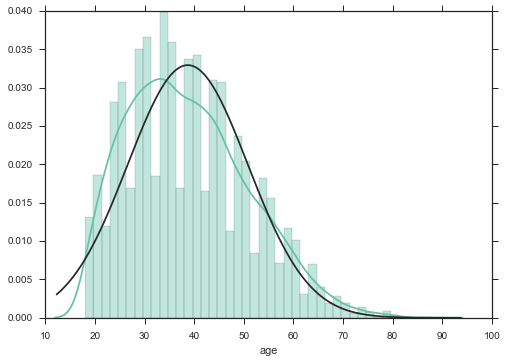

In [44]:
sns.distplot(data.age, rug=False, fit=sns.stats.norm)

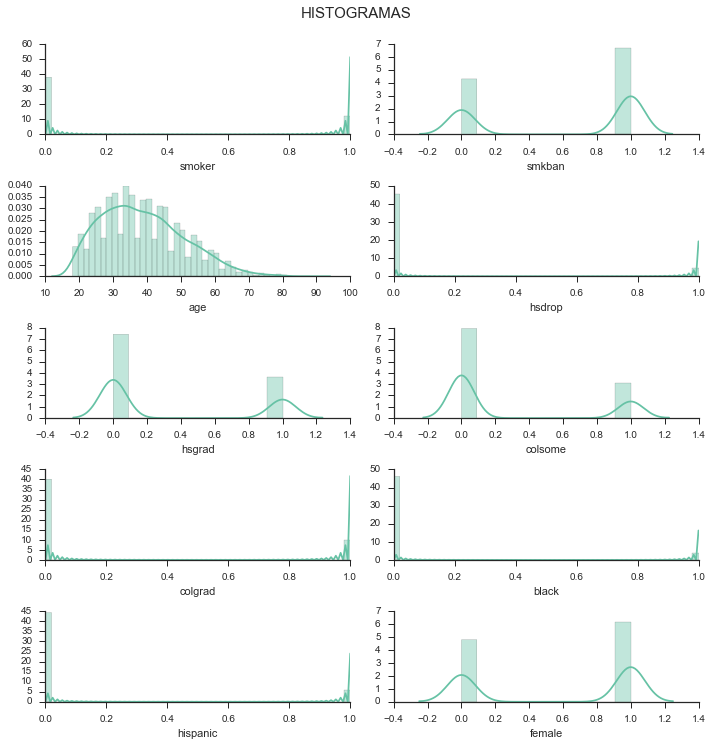

In [36]:
fs = (10,10)
fig = plt.figure(figsize=fs)

for i, col in enumerate(data.columns):
    ax = fig.add_subplot(5,2,i+1)
    g = sns.distplot(data[col], ax=ax)
    sns.despine()

plt.suptitle('HISTOGRAMAS', fontsize=15, y=1.03)
plt.tight_layout()

In [48]:
formula = 'smoker ~ smkban'
m1 = probit(formula, data).fit()
print(m1.summary())


Optimization terminated successfully.
         Current function value: 0.549867
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                10000
Model:                         Probit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Dec 2015   Pseudo R-squ.:                0.006953
Time:                        14:06:04   Log-Likelihood:                -5498.7
converged:                       True   LL-Null:                       -5537.2
                                        LLR p-value:                 1.711e-18
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5546      0.021    -26.126      0.000        -0.596    -0.513
smkban        -0.2448      0.

# b) 
En segundo lugar, vamos a __estimar__ un Modelo de __Probabilidad Lineal__ entre la variable __smoker__ y las explicativas siguientes: __smkban, age, age2, hsdrop, hsgrad, colsome, colgrad, black, hispanic y female__. 

¿Qué tipo de __preguntas__ pueden formularse con esta nueva __especificación__? 
Formular tres preguntas y tratar de responderlas a partir del modelo estimado.

Además, podemos preguntarnos si la __probabilidad de fumar depende__ o no del nivel de __educación__, para ello podemos hacer un contraste de significatividad conjunta de las variables educativas. ¿La probabilidad de fumar aumenta o disminuye con el nivel educativo?

¿Cuál sería la __probabilidad de que fumara un niño de 1 año__, independientemente del resto de variables consideradas?

In [49]:
formula2 = 'smoker ~ smkban + age + np.power(age, 2) + hsdrop +  hsgrad + colsome + colgrad + black + hispanic + female'
m2 = logit(formula2, data).fit()
print(m2.summary())

Optimization terminated successfully.
         Current function value: 0.523400
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Wed, 02 Dec 2015   Pseudo R-squ.:                 0.05475
Time:                        14:09:51   Log-Likelihood:                -5234.0
converged:                       True   LL-Null:                       -5537.2
                                        LLR p-value:                7.731e-124
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -2.9992      0.267    -11.227      0.000        -3.523    -2.476
smkban     

# c)
Estimar un modelo Probit y otro Logit con las variables del apartado a), comentar las diferencias observadas con la estimación del Modelo de Probabilidad Lineal. Calcular en cada caso la probabilidad de fumar según si los trabajadores tienen prohibido fumar en el trabajo.

Notar que cuando Gretl estima un modelo Probit, en la ventana de resultados aparece una columna que llama z, ese valor que pone Gretl es el equivalente al t-ratio habitual y no debe confundirse con el “valor-z” de la distribución Normal acumulada, que es el que hay que calcular para obtener la probabilidad de que ocurra el suceso de la variable endógena.

# d) 
Usando un modelo Probit, responder a las 3 mismas preguntas que os formulasteis en el apartado b) y calcular también la probabilidad de que fume un niño de 1 año, independientemente del resto de variables consideradas y ver cómo cambia la respuesta usando el modelo Probit.

Última modificación: martes, 10 de noviembre de 2015, 21:13